In [49]:
import os
from tqdm import tqdm

import torch
import lib.visualizations as visualizations
import torchvision
from torchvision.utils import draw_bounding_boxes

from data import PhysicalConcepts
from data.load_data import build_data_loader

In [2]:
%load_ext autoreload
%autoreload 2

In [51]:
dataset = PhysicalConcepts(
        split="test",
        num_frames=20,
        img_size=(64, 64),
        slot_initializer="BBox",
        get_masks=True
    )

PhysicalConcept sequences have 15 frames. Your num_frames = 20 will be overridden
Preparing PhysicalConcepts test set...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 26083.14it/s]

--> There have been found a total of 2077 sequences...


In [13]:
dataset.get_masks = True
imgs, data = dataset[0]
masks = data["masks"]

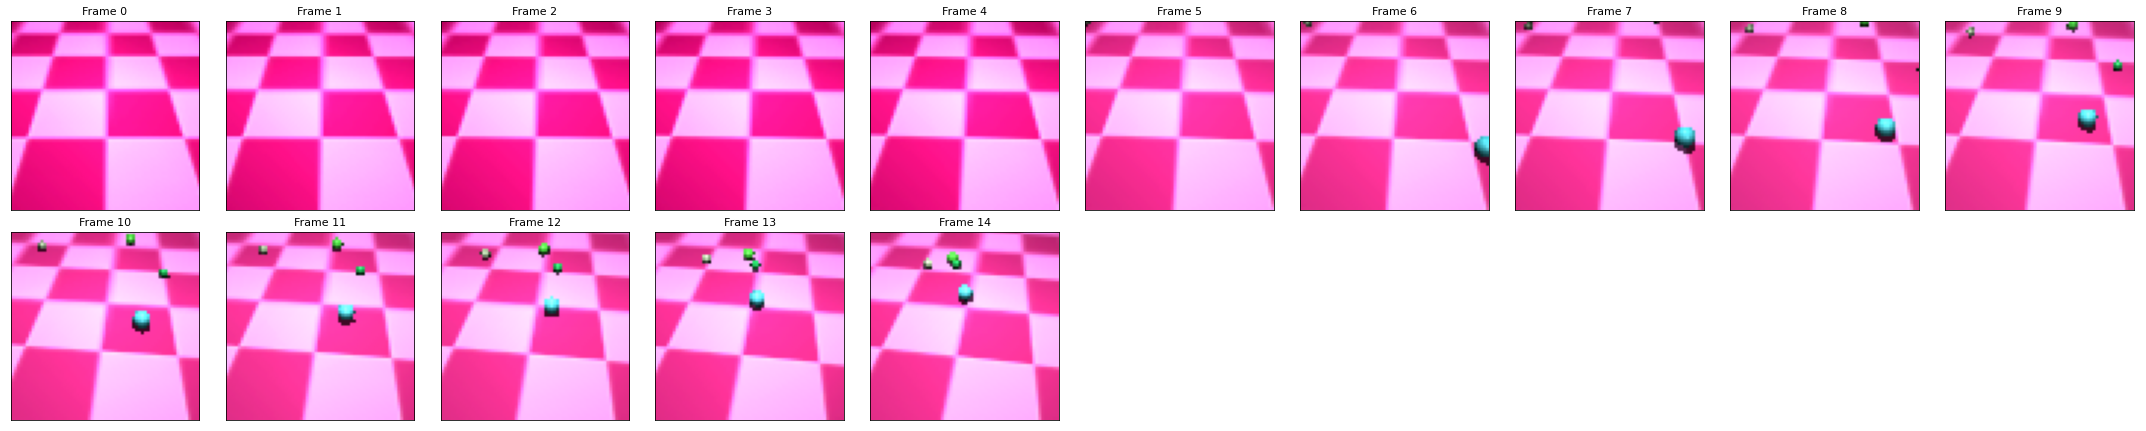

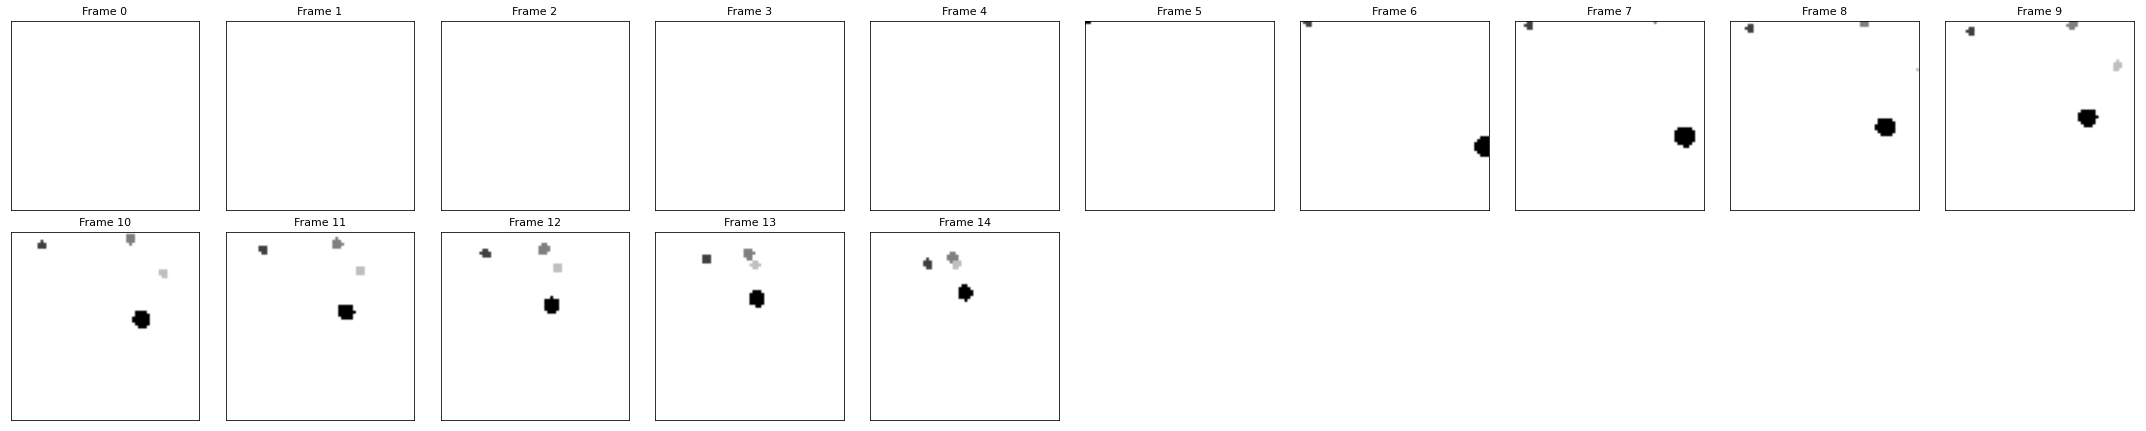

In [14]:
_ = visualizations.visualize_sequence(imgs)
_ = visualizations.visualize_sequence(masks / 255, cmap="gray_r")

In [15]:
if len(data["com_coords"]) > 0:
    bbox = torch.stack([data["com_coords"][..., 0], data["com_coords"][..., 1], data["com_coords"][..., 0]+2, data["com_coords"][..., 1]+2], dim=-1)
else:
    bbox = data["bbox_coords"]

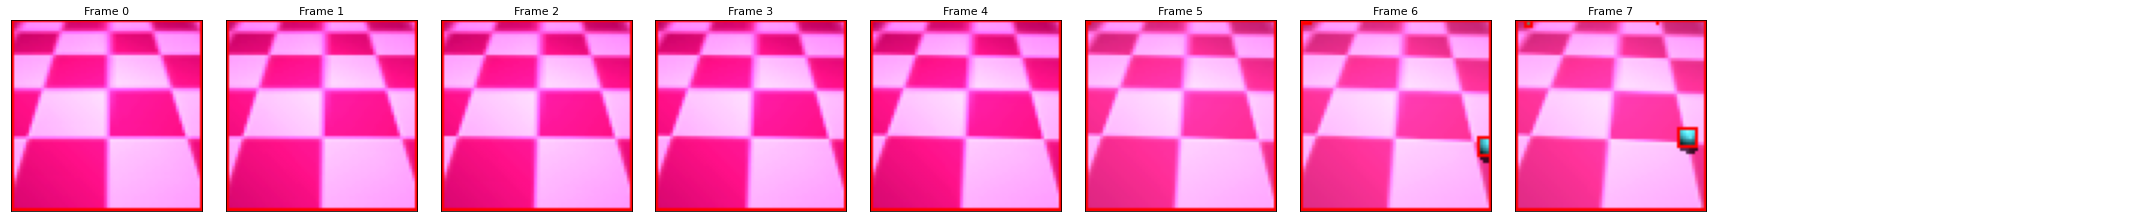

In [16]:
imgs_disp = torch.stack([
        draw_bounding_boxes(image=(imgs[i] * 255).to(torch.uint8), boxes=bbox[i], colors="red")
    for i in range(8)])
_ = visualizations.visualize_sequence(imgs_disp / 255)

In [41]:
from tqdm import tqdm

In [42]:
skip_seqs = []
for i, (imgs, data) in enumerate(tqdm(dataset)):
    masks = data["masks"]
    num_objs = len(masks.unique())
    if num_objs > 7:
        skip_seqs.append(data["seq_name"])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [02:13<00:00, 18.76it/s]


In [43]:
len(skip_seqs)

423

In [44]:
len(dataset)

2500

In [45]:
import json
path = "/home/nfs/inf6/data/datasets/PhysicalConcepts"
with open(os.path.join(path, "test_skip.json"), "w") as f:
    json.dump(skip_seqs, f)